In [48]:
def calculate_tpot_and_ttft(chunk_size, decode_bsz, prefill_tokens):
    tpot_ms = 13.014077 + 0.000145831 * 91750.4 + 0.0642 * chunk_size
    prefill_capacity = chunk_size - decode_bsz
    n_iter = (prefill_tokens + prefill_capacity - 1) // prefill_capacity
    ttft_ms = n_iter * tpot_ms
    prefill_capacity = prefill_tokens / (ttft_ms / 1000)
    return tpot_ms, ttft_ms, prefill_capacity

Text(0.5, 1.0, 'TPOT vs Chunk Size')

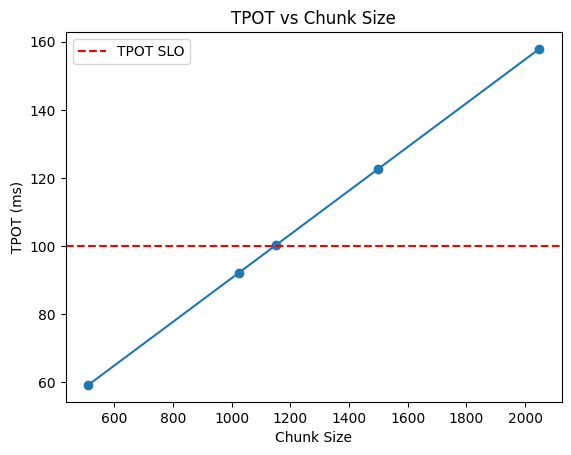

In [49]:
chunk_sizes = [512, 1024, 1150, 1500, 2048]
tpots = []
for chunk_size in chunk_sizes:
    tpot_ms, ttft_ms, _ = calculate_tpot_and_ttft(chunk_size, decode_bsz=64, prefill_tokens=10240)
    tpots.append(tpot_ms)

import matplotlib.pyplot as plt
plt.plot(chunk_sizes, tpots, marker='o')
plt.xlabel('Chunk Size')
plt.ylabel('TPOT (ms)')
plt.axhline(y=100, color='r', linestyle='--', label='TPOT SLO')
plt.legend() 
plt.title(f"TPOT vs Chunk Size")


10217.100455415888
10217.100455415888
11352.333839350986
10946.893345088452
11352.333839350986
5108.550227707944
8514.25037951324
9288.27314128717
9578.531676952394
9730.571862300845
5108.550227707944
8514.25037951324
8514.25037951324
8514.25037951324
8884.435178622512


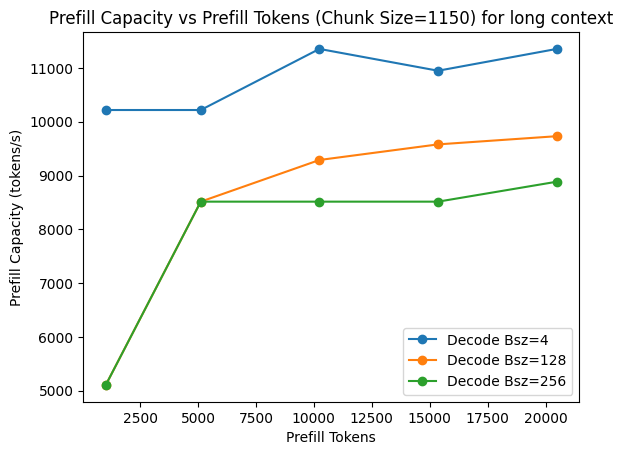

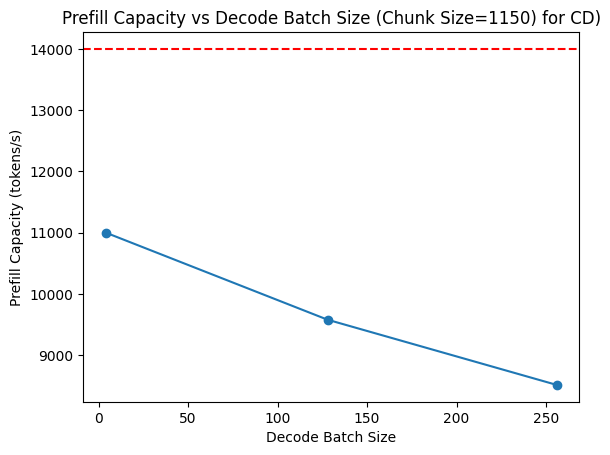

In [58]:
chunk_size = 1150
decode_bszs = [4, 128, 256]
prefill_tokens_list = [1024, 5120, 10240, 15360, 20480]
plt.figure()
for decode_bsz in decode_bszs:
    ttfts = []
    prefill_capacitys = []
    for prefill_tokens in prefill_tokens_list:
        tpot_ms, ttft_ms, prefill_capacity = calculate_tpot_and_ttft(chunk_size, decode_bsz, prefill_tokens)
        ttfts.append(ttft_ms)
        print(prefill_capacity)
        prefill_capacitys.append(prefill_capacity)
    plt.plot(prefill_tokens_list, prefill_capacitys, marker='o', label=f'Decode Bsz={decode_bsz}')
plt.xlabel('Prefill Tokens')
plt.ylabel('Prefill Capacity (tokens/s)')
# plt.axhline(y=2000, color='r', linestyle='--', label='TTFT SLO')
plt.legend()
plt.title(f"Prefill Capacity vs Prefill Tokens (Chunk Size={chunk_size}) for long context")

plt.figure()
plt.plot(decode_bszs, [11000, 9578, 8514], marker='o')
plt.xlabel(f"Decode Batch Size")
plt.ylabel('Prefill Capacity (tokens/s)')
plt.title(f"Prefill Capacity vs Decode Batch Size (Chunk Size={chunk_size}) for CD)")
plt.axhline(y=14000, color='r', linestyle='--', label='Prefill Capacity(Original)')

Text(0.5, 1.0, 'TTFT vs Prefill Tokens (Chunk Size=1150) for medium context')

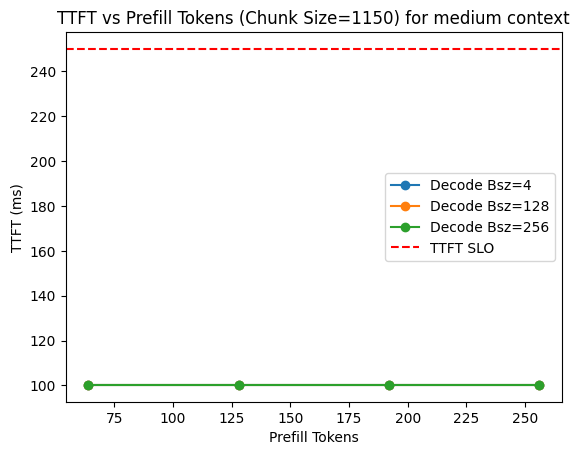

In [ ]:
chunk_size = 1150
decode_bszs = [4, 128, 256]
prefill_tokens_list = [64, 128, 192, 256]
plt.figure()
for decode_bsz in decode_bszs:
    ttfts = []
    for prefill_tokens in prefill_tokens_list:
        tpot_ms, ttft_ms = calculate_tpot_and_ttft(chunk_size, decode_bsz, prefill_tokens)
        ttfts.append(ttft_ms)
    plt.plot(prefill_tokens_list, ttfts, marker='o', label=f'Decode Bsz={decode_bsz}')
plt.xlabel('Prefill Tokens')
plt.ylabel('TTFT (ms)')
plt.axhline(y=250, color='r', linestyle='--', label='TTFT SLO')
plt.legend()
plt.title(f"TTFT vs Prefill Tokens (Chunk Size={chunk_size}) for medium context")